# Plotting

#### Configuration

By default, it uses `png` format. We prefer a vectorial format like `svg` for better results. Default font has been changed to _SF Mono_.

In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

import matplotlib
matplotlib.rcParams['font.family'] = "SF Mono"

#### Data preparation

We have included some sample data along with the notebooks. To simplify the usage, there's a function called `stock_prices` that you could use to load historical quotes for several well known stocks: `msft`, `goog`, `aapl` and `tsla`:

In [2]:
from sample_data import stock_prices
msft = stock_prices('msft')
msft.head()

,Close,High,Low,Open,Volume
Date,,,,,
2010-01-01,30.480,30.99,30.48,30.98,0
2010-01-04,30.950,31.10,30.59,30.65,38414185
2010-01-05,30.960,31.10,30.64,30.87,49758862
2010-01-06,30.770,31.08,30.52,30.88,58182332
2010-01-07,30.452,30.70,30.19,30.61,50564285


## Line

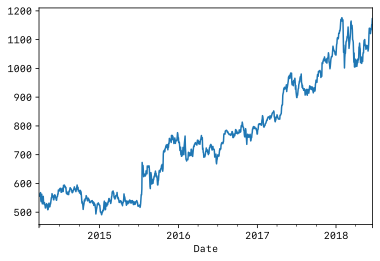

In [3]:
data = stock_prices('goog')
series = data['Close']
series.plot()

## Histograms

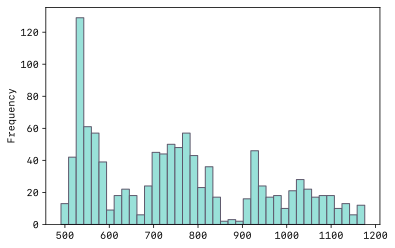

In [4]:
import matplotlib.pyplot as plt
data.Close.plot.hist(bins=40, color='#99E1D9', edgecolor='#5D576B')
plt.show()

Most of the formatting can be controlled setting some [parameters](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html#pandas.DataFrame.plot) in the plot function. Histogram, for instance, uses same parameters.

## Stacked

Possible `colormap` values can be checked [here](http://scipy.github.io/old-wiki/pages/Cookbook/Matplotlib/Show_colormaps).

array([<matplotlib.axes._subplots.AxesSubplot object at 0x113c52f90>,
      dtype=object)

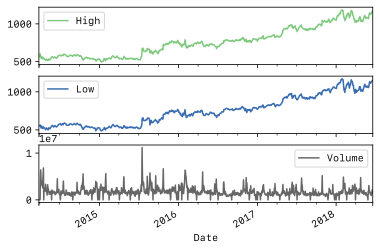

In [5]:
data[["High","Low","Volume"]].plot(subplots=True, colormap='Accent')

## Side-by-side

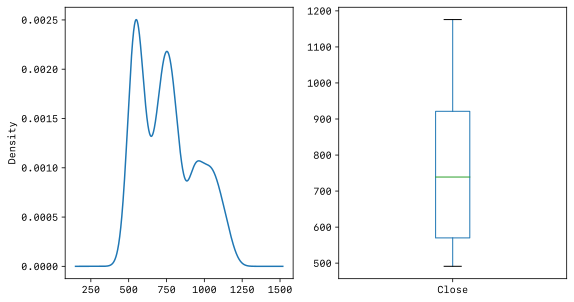

In [20]:
fig, axs = plt.subplots(1, 2, figsize=(9,5))
data.Close.plot.density(ax=axs[0])
data.Close.plot.box(ax=axs[1])

## Mixed

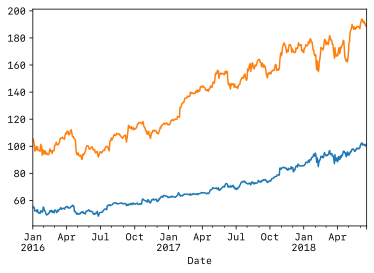

In [7]:
aapl = stock_prices('aapl')

msft.Close["2016":].plot()
aapl.Close["2016":].plot()
plt.show()

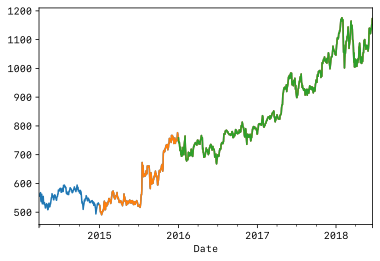

In [8]:
series["2014":].plot()
series["2015":].plot()
series["2016":].plot()
plt.show()

---

## Seaborn

[Seaborn](https://seaborn.pydata.org/) package has some interesting plots available. It's also based on matplotlib.

It should be included by default in Anaconda, otherwise do `pip install seaborn` from the command line.

In [21]:
import seaborn as sns

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

### Line

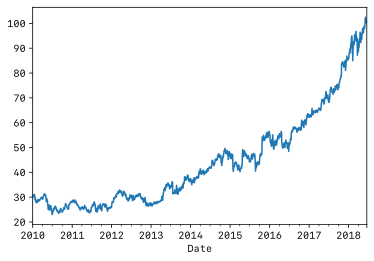

In [10]:
msft.Close.plot.line()

### Distribution

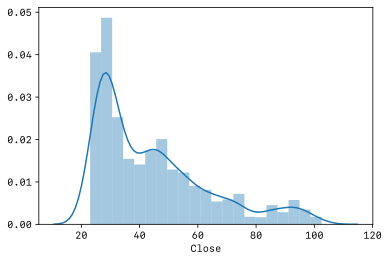

In [11]:
sns.distplot(msft.Close)

### Heatmaps

We want to produce a graph with values by month and year. As the `Date` index only contains a full date, we could produce two new columns using `month` and `year` values.

In [12]:
msft.loc[:,"Month"] = msft.index.map(lambda d: d.month)
msft.loc[:,"Year"]  = msft.index.map(lambda d: d.year)
msft.tail(3)

/Users/luis.belloch/src/master/pandas_notebooks/.direnv/python-3.7.7/lib/python3.7/site-packages/pandas/core/indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)


,Close,High,Low,Open,Volume,Month,Year
Date,,,,,,,
2018-06-15,100.13,101.53,100.07,101.51,65738585,6,2018
2018-06-18,100.86,101.11,99.42,100.01,23586037,6,2018
2018-06-19,100.86,101.00,99.50,99.65,26112992,6,2018


Then we can use the `pivot` function to compute a new `DataFrame`. Note we're resampling data to get values at the month level.

In [13]:
msft_pivot = msft.resample("M").pad().pivot("Month", "Year", "Close")
msft_pivot[:3]

Year,2010,2011,2012,2013,2014,2015,2016,2017,2018
Month,,,,,,,,,
1,28.1800,27.725,29.530,27.450,37.84,40.400,55.09,64.65,95.01
2,28.6700,26.580,31.740,27.800,38.31,43.850,50.88,63.98,93.77
3,29.2875,25.390,32.255,28.605,40.99,40.655,55.23,65.86,91.27


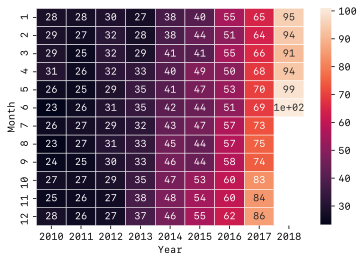

In [14]:
sns.heatmap(msft_pivot, annot=True, linewidths=.5)

### KDE

/Users/luis.belloch/src/master/pandas_notebooks/.direnv/python-3.7.7/lib/python3.7/site-packages/seaborn/distributions.py:690: UserWarning: Passing a 2D dataset for a bivariate plot is deprecated in favor of kdeplot(x, y), and it will cause an error in future versions. Please update your code.
  warnings.warn(warn_msg, UserWarning)


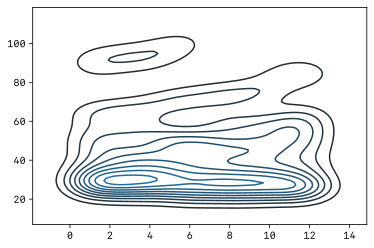

In [22]:
sns.kdeplot(msft[["Month", "Close"]])

## Styling

### Themes

There are five preset seaborn themes: `darkgrid`, `whitegrid`, `dark`, `white`, and `ticks`. By default it uses `darkgrid`.

We can change that for some plots only:

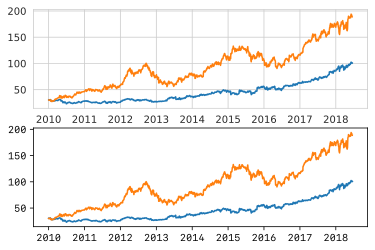

In [16]:
with sns.axes_style("whitegrid"):
    plt.subplot(211)
    plt.plot(msft.Close)
    plt.plot(aapl.Close)
plt.subplot(212)
plt.plot(msft.Close)
plt.plot(aapl.Close)

### Color palletes

Seaborn cames with many [color palletes](https://seaborn.pydata.org/tutorial/color_palettes.html#palette-tutorial), and some utils to work with colors.

To plot a pallete you can use the `palplot` function.

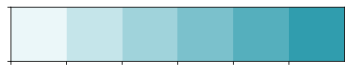

In [17]:
sns.palplot(sns.light_palette((210, 90, 60), input="husl"))

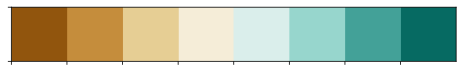

In [18]:
sns.palplot(sns.color_palette("BrBG", 8))

Most of the plotting functions accept a `cmap` parameter where you can set a pallete. When creating a pallete, don't forget to set `as_cmap=True`.

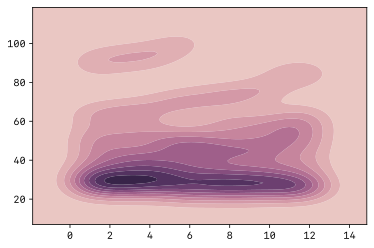

In [19]:
color_map = sns.cubehelix_palette(8, as_cmap=True)
sns.kdeplot(msft[["Month", "Close"]], cmap=color_map, shade=True)